In [58]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
data = pd.read_json('../JSON/predict_mvp.json')

In [133]:
data = data.dropna()

In [134]:
pos_mapping = {
    'PG': 1,
    'SG': 2,
    'SF': 3,
    'PF': 4,
    'C': 5
}

data['Pos'] = data['Pos'].map(pos_mapping)

In [135]:
data.describe()

,Season,Win_PCT,Age,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Share
count,5465.000000,5465.000000,5465.000000,5457.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,...,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000
mean,2010.045197,40.966148,26.613175,2.857797,67.689661,36.794511,1724.618847,272.201464,601.174565,0.447810,...,74.473742,218.857091,293.330833,163.575846,55.563952,32.711253,99.431107,144.511802,731.752059,0.009310
std,5.956526,12.348131,4.277573,1.368346,13.666987,30.399055,750.906501,168.268207,357.834007,0.054971,...,62.970403,139.445042,192.977479,143.849415,33.721607,36.467154,61.771124,59.845597,464.137359,0.074902
min,2000.000000,7.000000,19.000000,1.000000,1.000000,0.000000,5.000000,1.000000,3.000000,0.152000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
25%,2005.000000,33.000000,23.000000,2.000000,60.000000,6.000000,1140.000000,142.000000,325.000000,0.413000,...,29.000000,119.000000,153.000000,63.000000,30.000000,10.000000,53.000000,100.000000,374.000000,0.000000
50%,2010.000000,42.000000,26.000000,3.000000,72.000000,31.000000,1729.000000,241.000000,538.000000,0.442000,...,54.000000,189.000000,248.000000,119.000000,49.000000,20.000000,87.000000,143.000000,639.000000,0.000000
75%,2015.000000,50.000000,29.000000,4.000000,79.000000,68.000000,2304.000000,373.000000,815.000000,0.477000,...,102.000000,285.000000,385.000000,218.000000,74.000000,41.000000,135.000000,186.000000,999.000000,0.000000
max,2019.000000,73.000000,42.000000,5.000000,82.000000,82.000000,3485.000000,978.000000,2173.000000,0.719000,...,440.000000,894.000000,1247.000000,925.000000,225.000000,294.000000,464.000000,371.000000,2832.000000,1.000000


In [136]:
training = data[data['Share'] != 0]

### MVP Share分布圖

Text(0.5, 0, 'Award share')

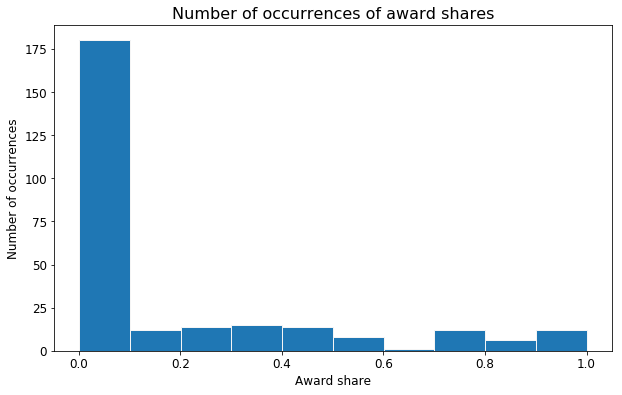

In [137]:
plt.figure(figsize=(10, 6))
plt.hist(training.Share, bins=10, edgecolor='#F5F5F5')
plt.title("Number of occurrences of award shares", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("Award share", size=12)

### 特徵關係圖

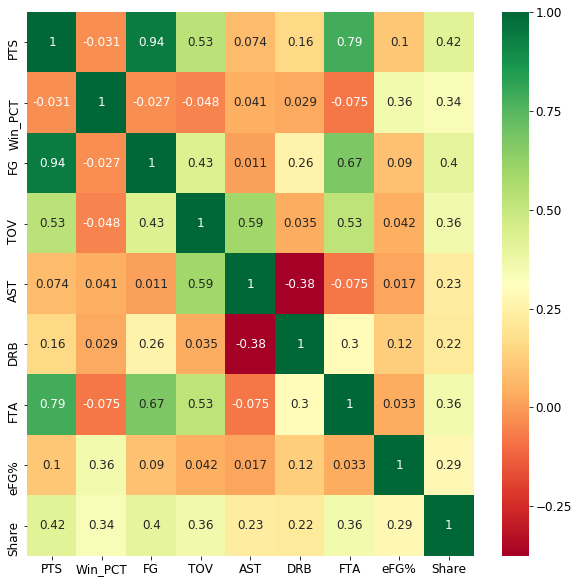

In [144]:
# 設定顯示特徵
cols = list(feature)
cols.append('Share')
# 視覺化特徵關係
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 12})
sns.heatmap(training[cols].corr(), annot=True, cmap="RdYlGn")

### 特徵重要度

In [139]:
from sklearn.ensemble import RandomForestRegressor

feat_X = training.drop(['Player', 'Season', 'Tm', 'Share'], axis=1)
feat_y = training['Share']
model = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True)
model.fit(feat_X, feat_y)

C:\Users\ying\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [140]:
feat_labels = feat_X.columns
# print(feat_labels)
importances = model.feature_importances_
# print(importances)
indices = np.argsort(importances)[::-1]
# print(indices)
for feat in range(feat_X.shape[1]):
    print("%d) %-*s %f" % (feat + 1, 30, feat_labels[indices[feat]], importances[indices[feat]]))

1) FG                             0.164933
2) PTS                            0.147078
3) Win_PCT                        0.139214
4) TOV                            0.060082
5) DRB                            0.058243
6) 2P%                            0.051010
7) AST                            0.046448
8) FTA                            0.037218
9) FT%                            0.035022
10) STL                            0.030988
11) TRB                            0.020203
12) FGA                            0.019946
13) PF                             0.018485
14) 2P                             0.017004
15) 3P                             0.016425
16) Age                            0.015804
17) 3P%                            0.015206
18) GS                             0.014895
19) MP                             0.014040
20) 3PA                            0.013239
21) FG%                            0.012438
22) eFG%                           0.012214
23) BLK                            0.0120

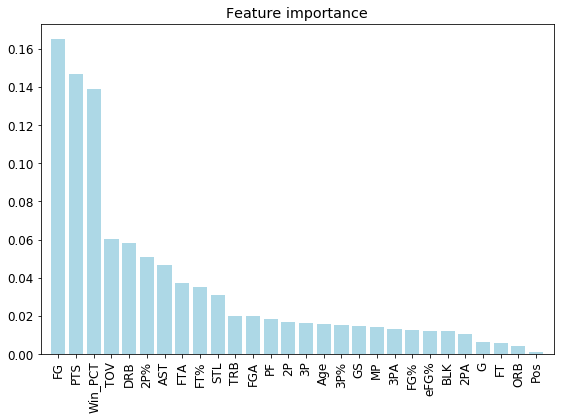

In [141]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Feature importance')
plt.bar(range(feat_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(feat_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, feat_X.shape[1]])
plt.tight_layout()
plt.show()

# <font color=" #FF0000">選擇特徵

In [142]:
training.columns

Index(['Player', 'Season', 'Tm', 'Win_PCT', 'Age', 'Pos', 'G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Share'],
      dtype='object')

In [166]:
feature = ['PTS', 'Win_PCT', 'FG', 'TOV', 'AST', 'DRB', 'FTA', 'eFG%']
# feature = ['PTS', 'Win_PCT', 'FG', 'TOV', 'AST', 'DRB', 'FTA', 'STL']
# feature = ['PTS', 'Win_PCT', 'FG', 'TOV', 'AST', 'DRB', 'FT', 'PF']
print(feature)

['PTS', 'Win_PCT', 'FG', 'TOV', 'AST', 'DRB', 'FTA', 'eFG%']


### 拆分訓練及驗證資料

In [167]:
X = training[feature]
y = training['Share']

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_sqrt_train, X_sqrt_valid, y_sqrt_train, y_sqrt_valid = train_test_split(X, np.sqrt(y), test_size=0.3, random_state=42)

## K-fold

In [169]:
from sklearn.model_selection import GroupShuffleSplit
cols = list(feature)
cols.append('Season')

def K_fold(model):
    temp_X = training[cols]
    temp_y = training[['Share', 'Season']]
    scores = []

    for year in range(2010, 2020):
        X_train_data, y_train_data = temp_X[temp_X['Season'] != year].drop('Season',axis=1).to_numpy(), temp_y[temp_y['Season'] != year].drop('Season',axis=1).to_numpy()
        X_valid_data, y_valid_data = temp_X[temp_X['Season'] == year].drop('Season',axis=1).to_numpy(), temp_y[temp_y['Season'] == year].drop('Season',axis=1).to_numpy()
        model.fit(X_train_data, y_train_data)
        score = model.score(X_valid_data, y_valid_data)
        scores.append(score)
        print('Fold year: %d, Score: %.5f' % (year, score))
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

### 計算準確率

In [170]:
# Create function that gives accuracy scores for each model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def scores(y, model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    print("預測訓練 R2 score: %.3f" % r2_score(y_train, model.predict(X_train)))
    print("Mean squared error: %.3f" % mean_squared_error(y_valid, y_pred))
    print('R2 score: %.3f' % r2_score(y_valid, y_pred))

### 調整參數

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
# 透過視覺化尋找適合的參數
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
def find_param(name, param):
    train_scores, valid_scores = validation_curve(estimator=rf, X=X_train, y=y_train, param_name=name, param_range=param, cv=10)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.std(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(param, train_mean, color='blue', marker='o', markersize=5, label='train accuracy')
    plt.fill_between(param, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
    plt.plot(param, valid_mean, color='red', marker='s', linestyle='--', markersize=5, label='valid accuracy')
    plt.fill_between(param, valid_mean+valid_std, valid_mean-valid_std, alpha=0.15, color='red')
    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel(name)
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.0])
    plt.show()

In [ ]:
# [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
param = [10, 100, 300, 500, 1000, 5000, 10000, 11500, 15000]
find_param('n_estimators', param)

In [ ]:
# random_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
}

In [ ]:
# Create a based model
try_rf = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, n_estimators=890, min_samples_split=8, max_leaf_nodes=14)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = try_rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='r2')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

## Random Forest Regressor

In [221]:
# rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=905, max_depth=16, min_samples_split=6, min_samples_leaf=2, bootstrap=True, max_leaf_nodes=14, oob_score=True)
rf = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, max_depth=30, n_estimators=157, min_samples_split=4, min_samples_leaf=2, bootstrap=True, max_leaf_nodes=18)

In [222]:
y_rf = []
scores(y_rf, rf)

預測訓練 R2 score: 0.816
Mean squared error: 0.028
R2 score: 0.418


In [ ]:
K_fold(rf)

### 執行預測

In [ ]:
pred = data[data['Season'] == 2019]

In [ ]:
t = data[(data['Season'] != 2019) & (data['Share'] != 0)]

In [ ]:
t_X = t[feature]
t_y = t['Share']

In [ ]:
rf.fit(t_X, t_y)
result = rf.predict(pred[feature])

In [ ]:
names = list(pred.Player)
# print(names)
# predtions = model.feature_importances_
# print(importances)
indices = np.argsort(result)[::-1]
# print(result)
# print(indices)
# print(names)
rank = []
for player in range(0, 15):
    print("%d) %-*s %f" % (player + 1, 30, names[indices[player]], result[indices[player]]))
    temp = {
        'name': names[indices[player]],
        'share': result[indices[player]]
    }
    rank.append(temp)

In [ ]:
a = pd.DataFrame(rank)

In [ ]:
with open('../JSON/mvp.json', 'w') as file_object:
            json.dump(rank, file_object)